# Sujet 7 : Autour du SARS-CoV-2 (COVID-19)

Le but est ici de reproduire des graphes semblables à ceux du South China Morning Post (SCMP), sur la page The Coronavirus Pandemic et qui montrent pour différents pays le nombre cumulé (c'est-à-dire le nombre total de cas depuis le début de l'épidémie) de personnes atteintes de la maladie à coronavirus 2019.

Les données utilisées pour cet excercice proviennent du [Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE)](https://systems.jhu.edu/). 

On commence par charger les données, qui ont été mises à disposition sur GitHub :

In [1]:
data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

Si jamais l'url a été modifié, on preferera travailler sur une copie locale des fichiers.

In [2]:
data_file = "time_series_covid19_confirmed_global.csv.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

Le fichier présente des séries temporelles du nombre de décès dus au covid dans 288 régions du monde. Les données concernent une période temporelle s'étalant entre le 22 janvier 2020 et le 09 mars 2023. Il est au format csv et est organisé comme suit :

| colonne 1 | colonne 2 | colonne 3 | colonne 4 | colonnes 5 à 1147 |
|---    |:-:    |:-:    |:-:    |--:    |
| Province/State | Country/Region | Latitude | Longitude | date format dd/mm/yy |

Pour charger les données, on utilise la librairie pandas, que l'on doit importer.
La première ligne du document renseigne les intitulés des différentes colonnes, on évite de la charger grâce à la commande 'skiprows=1'.

In [3]:
import pandas as pd

data=pd.read_csv(data_url,skiprows=0)


On vérifie s'il existe des points manquant dans ce jeu de données. Pour cela, on vérifie d'abord que toutes les lignes sont associées à un pays, et que les nombres de décès ont bien été recensés pour toutes les dates : 

In [4]:
data[data['Country/Region'].isna()]

Empty DataFrame
Columns: [Province/State, Country/Region, Lat, Long, 1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20, 1/28/20, 1/29/20, 1/30/20, 1/31/20, 2/1/20, 2/2/20, 2/3/20, 2/4/20, 2/5/20, 2/6/20, 2/7/20, 2/8/20, 2/9/20, 2/10/20, 2/11/20, 2/12/20, 2/13/20, 2/14/20, 2/15/20, 2/16/20, 2/17/20, 2/18/20, 2/19/20, 2/20/20, 2/21/20, 2/22/20, 2/23/20, 2/24/20, 2/25/20, 2/26/20, 2/27/20, 2/28/20, 2/29/20, 3/1/20, 3/2/20, 3/3/20, 3/4/20, 3/5/20, 3/6/20, 3/7/20, 3/8/20, 3/9/20, 3/10/20, 3/11/20, 3/12/20, 3/13/20, 3/14/20, 3/15/20, 3/16/20, 3/17/20, 3/18/20, 3/19/20, 3/20/20, 3/21/20, 3/22/20, 3/23/20, 3/24/20, 3/25/20, 3/26/20, 3/27/20, 3/28/20, 3/29/20, 3/30/20, 3/31/20, 4/1/20, 4/2/20, 4/3/20, 4/4/20, 4/5/20, 4/6/20, 4/7/20, 4/8/20, 4/9/20, 4/10/20, 4/11/20, 4/12/20, 4/13/20, 4/14/20, 4/15/20, 4/16/20, 4/17/20, 4/18/20, 4/19/20, 4/20/20, 4/21/20, 4/22/20, 4/23/20, 4/24/20, 4/25/20, 4/26/20, ...]
Index: []

[0 rows x 1147 columns]

Les lignes sont bien bien associées à des pays ou régions.

In [4]:
liste_dates=list(data.columns[4:])
for i in range(len(liste_dates)) :
    data[data[liste_dates[i]].isnull()]

Il semble qu'aucune donnée nécéssaire à notre étude ne soit manquante, on peut donc charger à nouveau le fichier en s'affranchissant des intitulés de colonnes.

Seules les données de certains pays nous intéresse. On stocke les noms de ces pays dans une liste.

In [12]:
liste_pays=['Belgium','China','China, Hong-Kong','France','Germany','Iran','Italy','Japan','Korea, South','Netherlands','Portugal','Spain','United Kingdom','US']

Parmi ces pays, certains sont divisés en plusieurs provinces dans le fichier. Il faut les rassembler pour calculer les nombres de cas cumulés. On prend également soin de séparer Hong-Kong des provinces de Chine.
Pour la représentation graphique, on importe le module pyplot du package matplotlib.

On utilise la fonction groupby pour regrouper les données associées à un même pays, à l'exception de Hong-Kong, et des provinces des Pays-Bas et du Royaume-Uni.

Pour éviter que ces régions ne soient prises en compte dans le calcul des cas cumulés, on va modifier le nom du pays pour ces lignes. On affiche d'abord la liste des provinces associées à chaque pays concerné par l'étude.

In [22]:
dataBel=data['Belgium'].axis(0)
dataBel

KeyError: 'Belgium'

In [21]:
data2=data.groupby(['Country/Region']).sum()

Belgium
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
China
France
France
France
France
France
France
France
France
France
France
France
France
Germany
Iran
Italy
Japan
Korea, South
Netherlands
Netherlands
Netherlands
Netherlands
Netherlands
Portugal
Spain
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
US


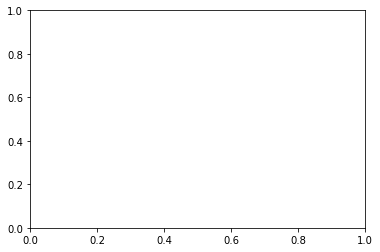

In [13]:
import matplotlib.pyplot as plt

fig=plt.figure()
ax=plt.subplot(111)

for j in liste_pays :
    values=[]
    for i in range (len(data[:])):
        if data.iat[i,1]==j :
            print(j)
            for d in liste_dates : 
                values.append(data.at[i,d])
            #plt.plot(liste_dates,values,'x')
        #plt.legend()
           
            

In [9]:
ligne=data.loc[0][4:1147]
print(ligne[1:3])
print(ligne[1:3][1:])


1/23/20    0
1/24/20    0
Name: 0, dtype: object
1/24/20    0
Name: 0, dtype: object


In [10]:
data.iat[0,1146]

209451

In [23]:
head=data.columns
head

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

In [ ]:
list(data.columns[5:8])

In [ ]:
data2=data.groupby(by=['Country/Region']).sum()

In [ ]:
data2 #apres on pourrait transposer et récupérer plus facilement les valeurs pour chaque pays dans une liste.

In [ ]:
DataFrame.pivot(*, columns, index=typing.Literal[<no_default>], values=typing.Literal[<no_default>])[source]

In [4]:
#data.set_index(['Province/State','Country/Region'])
data=data.reindex(['Country/Region','Province/State']+liste_dates,axis=1)
data

Country/Region                                Province/State  \
0               Afghanistan                                           NaN   
1                   Albania                                           NaN   
2                   Algeria                                           NaN   
3                   Andorra                                           NaN   
4                    Angola                                           NaN   
5                Antarctica                                           NaN   
6       Antigua and Barbuda                                           NaN   
7                 Argentina                                           NaN   
8                   Armenia                                           NaN   
9                 Australia                  Australian Capital Territory   
10                Australia                               New South Wales   
11                Australia                            Northern Territory   
12                Australia                                    Queensland   
13                Australia                               South Australia   
14                Australia                                      Tasmania   
15                Australia                                      Victoria   
16                Australia                             Western Australia   
17                  Austria                                           NaN   
18               Azerbaijan                                           NaN   
19                  Bahamas                                           NaN   
20                  Bahrain                                           NaN   
21               Bangladesh                                           NaN   
22                 Barbados                                           NaN   
23                  Belarus                                           NaN   
24                  Belgium                                           NaN   
25                   Belize                                           NaN   
26                    Benin                                           NaN   
27                   Bhutan                                           NaN   
28                  Bolivia                                           NaN   
29   Bosnia and Herzegovina                                           NaN   
..                      ...                                           ...   
259                  Tuvalu                                           NaN   
260                      US                                           NaN   
261                  Uganda                                           NaN   
262                 Ukraine                                           NaN   
263    United Arab Emirates                                           NaN   
264          United Kingdom                                      Anguilla   
265          United Kingdom                                       Bermuda   
266          United Kingdom                        British Virgin Islands   
267          United Kingdom                                Cayman Islands   
268          United Kingdom                               Channel Islands   
269          United Kingdom                   Falkland Islands (Malvinas)   
270          United Kingdom                                     Gibraltar   
271          United Kingdom                                      Guernsey   
272          United Kingdom                                   Isle of Man   
273          United Kingdom                                        Jersey   
274          United Kingdom                                    Montserrat   
275          United Kingdom                              Pitcairn Islands   
276          United Kingdom  Saint Helena, Ascension and Tristan da Cunha   
277          United Kingdom                      Turks and Caicos Islands   
278          United Kingdom                                           NaN   
279      

In [46]:
data.iloc[0,1] -> donne la province.

0

In [52]:
data.loc[data['Country/Region'] == 'France'].index

Int64Index([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131], dtype='int64')

In [56]:
dataFrance

Country/Region             Province/State  1/22/20  1/23/20  1/24/20  \
120         France              French Guiana        0        0        0   
121         France           French Polynesia        0        0        0   
122         France                 Guadeloupe        0        0        0   
123         France                 Martinique        0        0        0   
124         France                    Mayotte        0        0        0   
125         France              New Caledonia        0        0        0   
126         France                    Reunion        0        0        0   
127         France           Saint Barthelemy        0        0        0   
128         France  Saint Pierre and Miquelon        0        0        0   
129         France                  St Martin        0        0        0   
130         France          Wallis and Futuna        0        0        0   
131         France                        NaN        0        0        2   

     1/25/20  1/26/20  1/27/20  1/28/20  1/29/20    ...      2/28/23  \
120        0        0        0        0        0    ...        98041   
121        0        0        0        0        0    ...        77957   
122        0        0        0        0        0    ...       201852   
123        0        0        0        0        0    ...       228875   
124        0        0        0        0        0    ...        42004   
125        0        0        0        0        0    ...        80007   
126        0        0        0        0        0    ...       494595   
127        0        0        0        0        0    ...         5439   
128        0        0        0        0        0    ...         3452   
129        0        0        0        0        0    ...        12257   
130        0        0        0        0        0    ...         3427   
131        3        3        3        4        5    ...     38579269   

       3/1/23    3/2/23    3/3/23    3/4/23    3/5/23    3/6/23    3/7/23  \
120     98041     98041     98041     98041     98041     98041     98041   
121     77957     77957     77957     77957     77957     77957     77957   
122    201852    201852    201852    201852    201852    201852    201852   
123    228875    228875    228875    228875    228875    228875    228875   
124     42004     42004     42004     42004     42004     42004     42004   
125     80007     80007     80007     80007     80007     80007     80007   
126    494595    494595    494595    494595    494595    494595    494595   
127      5439      5439      5439      5439      5439      5439      5439   
128      3452      3452      3452      3452      3452      3452      3452   
129     12257     12257     12257     12257     12257     12257     12257   
130      3427      3427      3427      3427      3427      3427      3427   
131  38583794  38587990  38591184  38591184  38591184  38599330  38606393   

       3/8/23    3/9/23  
120     98041     98041  
121     78055     78055  
122    201886    201886  
123    229020    229020  
124     42004     42004  
125     80017     80017  
126    494595    494595  
127      5441      5441  
128      3452      3452  
129     12271     12271  
130      3427      3427  
131  38612201  38618509  

[12 rows x 1145 columns]

In [59]:
plt.plot(liste_dates,data.iloc[131,2:])

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fa0aa5c9c80> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fa0aa68abf8> (for post_execute):


KeyboardInterrupt: 

In [74]:
valeurs=data.iloc[131,2:5].values

In [75]:
valeurs

array([0, 0, 2], dtype=object)

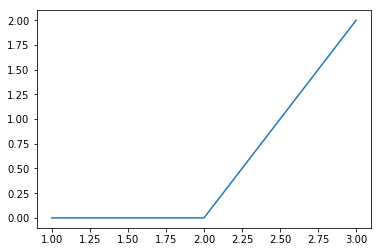

In [76]:
plt.plot([1,2,3],valeurs)

On commence par réorganiser la dataframe selon nos besoins.

In [5]:
data=data.reindex(['Country/Region','Province/State']+liste_dates,axis=1)

On récupère ensuite les données qui nous intéresse pour chaque pays. Pour les pays sans province/state on peut récupérer les données directement, sinon il faut sommer les données des régions au moyen de la fonction groupby. Pour les pays dont on ne considère par les territoires d'outre-mer, on prend uniquement la dernière ligne correspondante, soit le maximum des indices.

In [28]:
dataBel=data.iloc[max(data.loc[data['Country/Region'] == 'Belgium'].index),2:]
dataHK=data.iloc[max(data.loc[data['Province/State']=='Hong Kong'].index),2:]
dataFra=data.iloc[max(data.loc[data['Country/Region'] == 'France'].index),2:]
dataGer=data.iloc[max(data.loc[data['Country/Region'] == 'Germany'].index),2:]
dataIra=data.iloc[max(data.loc[data['Country/Region'] == 'Iran'].index),2:]
dataIta=data.iloc[max(data.loc[data['Country/Region'] == 'Italy'].index),2:]
dataJap=data.iloc[max(data.loc[data['Country/Region'] == 'Japan'].index),2:]
dataSK=data.iloc[max(data.loc[data['Country/Region'] == 'Korea, South'].index),2:]
dataNeth=data.iloc[max(data.loc[data['Country/Region'] == 'Netherlands'].index),2:]
dataPort=data.iloc[max(data.loc[data['Country/Region'] == 'Portugal'].index),2:]
dataSpa=data.iloc[max(data.loc[data['Country/Region'] == 'Spain'].index),2:]
dataUK=data.iloc[max(data.loc[data['Country/Region'] == 'United Kingdom'].index),2:]
dataUS=data.iloc[max(data.loc[data['Country/Region'] == 'US'].index),2:]

#on trouve les indices correpsondants à la Chine et à HK puis on retire la ligne correspondant à Hong Kong pour ne pas qu'elle soit prise en compte deux fois. 
indicesChi=data.loc[data['Country/Region'] == 'China'].index
indiceHK=data.loc[data['Province/State']=='Hong Kong'].index
listeindicesChi=list(indicesChi)
listeindicesChi.remove(int(indiceHK.values[0]))

dataChi=data.iloc[listeindicesChi,2:].sum() #on somme sur toutes les provinces de Chine


In [23]:
dataBel.values

array([0, 0, 0, ..., 4727795, 4727795, 4739365], dtype=object)

In [100]:
dataUK=data.iloc[max(data.loc[data['Country/Region'] == 'Netherlands'].index),2:]

Int64Index([59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
            76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,
            92],
           dtype='int64')
Int64Index([71], dtype='int64')
[59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]


In [42]:
indiceHK.values[0]

71

In [15]:
print(indicesChi)

None


In [110]:
indicesChi=data.loc[data['Country/Region'] == 'China'].index
indiceHK=data.loc[data['Province/State']=='Hong Kong'].index

In [104]:
indicesChi
indiceHK

Int64Index([71], dtype='int64')

In [112]:
list(indicesChi).remove(indiceHK)

In [116]:
dataChi=data.iloc[indicesChi,2:]

In [29]:
import matplotlib.axes as ax
import matplotlib.pyplot as plt
def plotcumul(data,dates,legende,**argsupp):
    fig=plt.figure(figsize=(24,6))
    if 'ax' in argsupp.keys():
        ax=argsupp['ax']
    else : ax=plt.subplot(111)   
    ax.plot(dates[:],data.values[:],label=legende)
    ax.legend()
    return(fig,ax)

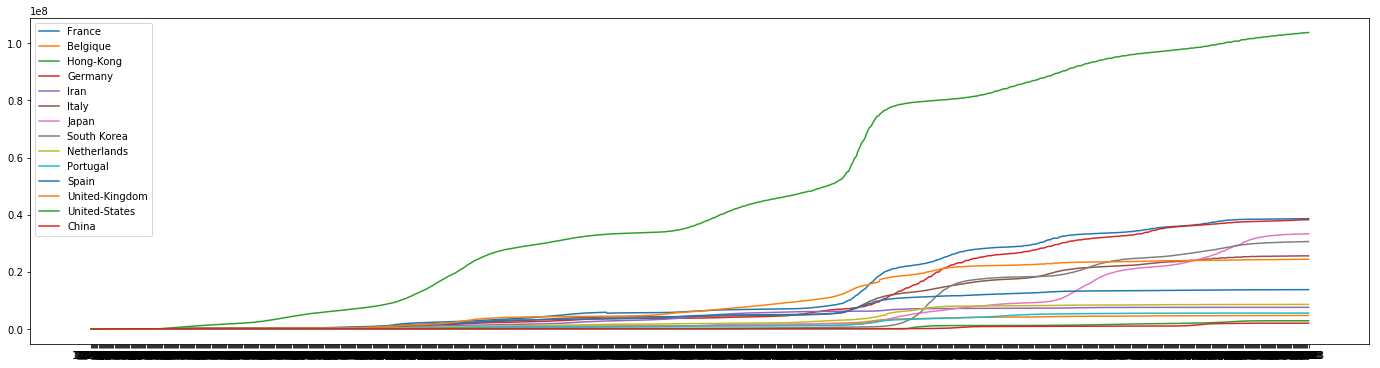

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

In [30]:
fig,ax=plotcumul(dataFra,liste_dates,'France')
fig,ax=plotcumul(dataBel,liste_dates,'Belgique',ax=ax)
fig,ax=plotcumul(dataHK,liste_dates,'Hong-Kong',ax=ax)
fig,ax=plotcumul(dataGer,liste_dates,'Germany',ax=ax)
fig,ax=plotcumul(dataIra,liste_dates,'Iran',ax=ax)
fig,ax=plotcumul(dataIta,liste_dates,'Italy',ax=ax)
fig,ax=plotcumul(dataJap,liste_dates,'Japan',ax=ax)
fig,ax=plotcumul(dataSK,liste_dates,'South Korea',ax=ax)
fig,ax=plotcumul(dataNeth,liste_dates,'Netherlands',ax=ax)
fig,ax=plotcumul(dataPort,liste_dates,'Portugal',ax=ax)
fig,ax=plotcumul(dataSpa,liste_dates,'Spain',ax=ax)
fig,ax=plotcumul(dataUK,liste_dates,'United-Kingdom',ax=ax)
fig,ax=plotcumul(dataUS,liste_dates,'United-States',ax=ax)
fig,ax=plotcumul(dataChi,liste_dates,'China',ax=ax)


In [18]:
plt.plot(liste_dates,dataPort.values)

ValueError: x and y must have same first dimension, but have shapes (1143,) and (1, 1143)

Error in callback <function flush_figures at 0x7feb6abb0bf8> (for post_execute):


KeyboardInterrupt: 

In [16]:
dataFra.values

array([0, 0, 2, ..., 38606393, 38612201, 38618509], dtype=object)

In [50]:
liste_dates

['1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 '4/4/20',
 '4/5/20',
 '4/6/20',
 '4/7/20',
 '4/8/20',
 '4/9/20',
 '4/10/20',
 '4/11/20',
 '4/12/20',
 '4/13/20',
 '4/14/20',
 '4/15/20',
 '4/16/

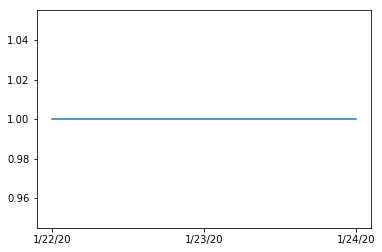